<a href="https://colab.research.google.com/github/pkrodev/ML_Tutorial/blob/main/7/Model_rozpoznawania_zdjec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Pobieranie i wypakowywanie plików
#!wget https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
#!unzip -q flying-vehicles.zip

--2024-03-27 17:08:02--  https://storage.googleapis.com/esmartdata-courses-files/ann-course/flying-vehicles.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540232238 (1.4G) [application/x-zip-compressed]
Saving to: ‘flying-vehicles.zip.1’

flying-vehicles.zip 100%[===================>]   1.43G  24.9MB/s    in 60s     

2024-03-27 17:09:03 (24.5 MB/s) - ‘flying-vehicles.zip.1’ saved [1540232238/1540232238]

replace data/planes/drone/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [7]:
import os
import shutil
folder_do_usuniecia = './images'
if os.path.exists(folder_do_usuniecia):
    shutil.rmtree(folder_do_usuniecia)
    print("Folder został usunięty.")
else:
    print("Folder nie istnieje.")

Folder został usunięty.


In [8]:
# Importowanie niezbędnych bibliotek
import os
import shutil

# Funkcja do kopiowania plików z jednego katalogu do drugiego
def copy_files(source_dir, dest_dir, filenames):
    """
    Funkcja kopiująca pliki z jednego katalogu źródłowego do docelowego.

    Parametry:
    source_dir (str): Ścieżka do katalogu źródłowego.
    dest_dir (str): Ścieżka do katalogu docelowego.
    filenames (list): Lista nazw plików do skopiowania.
    """
    for fname in filenames:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(dest_dir, fname)
        shutil.copyfile(src, dst)

# Funkcja do tworzenia katalogów, jeśli nie istnieją
def make_dirs(dirs):
    """
    Funkcja tworząca katalogi, jeśli nie istnieją.

    Parametry:
    dirs (list): Lista ścieżek do katalogów do utworzenia.
    """
    for directory in dirs:
        if not os.path.exists(directory):
            os.mkdir(directory)




In [9]:
# Etap 1: Tworzenie katalogów dla danych treningowych, walidacyjnych i testowych

# Ścieżki do katalogów
base_dir = './data/planes'
make_dirs(['./images'])
data_dir = './images'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Lista katalogów
dirs = [train_dir, valid_dir, test_dir]

# Tworzenie katalogów, jeśli nie istnieją
make_dirs(dirs)


In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

In [11]:
import os

classes = ['drone', 'passenger-plane']

# Obliczanie minimalnego rozmiaru zbioru danych
total_size = float('inf')

# Iteracja po klasach obiektów
for cls in classes:
    # Ścieżka do katalogu z obiektami danej klasy
    class_dir = os.path.join(base_dir, cls)       #'./data/planes/drone'  ./data/planes/passenger-plane

    # Lista nazw plików obiektów danej klasy
    class_files = os.listdir(class_dir)

    # Filtrowanie plików obrazów
    class_files = [fname for fname in class_files if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

    # Obliczanie minimalnego rozmiaru zbioru danych
    total_size = min(total_size, len(class_files))

# Obliczanie rozmiarów zbiorów treningowych, walidacyjnych i testowych
train_size = int(total_size * 0.7)
valid_size = int(total_size * 0.2)
test_size = total_size - train_size - valid_size

# Iteracja po klasach obiektów
for cls in classes:
    # Ścieżka do katalogu z obiektami danej klasy
    class_dir = os.path.join(base_dir, cls)

    # Lista nazw plików obiektów danej klasy
    class_files = os.listdir(class_dir)

    # Filtrowanie plików obrazów
    class_files = [fname for fname in class_files if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

    # Przycinanie listy plików do ustalonego rozmiaru
    class_files = class_files[:total_size]

    # Podział plików na zbiory treningowy, walidacyjny i testowy
    train_files = class_files[:train_size]
    valid_files = class_files[train_size:train_size + valid_size]
    test_files = class_files[train_size + valid_size:]

    # Ścieżki do katalogów dla zbiorów treningowego, walidacyjnego i testowego
    train_dest = os.path.join(train_dir, cls)
    valid_dest = os.path.join(valid_dir, cls)
    test_dest = os.path.join(test_dir, cls)

    # Tworzenie katalogów dla zbiorów treningowego, walidacyjnego i testowego
    make_dirs([train_dest, valid_dest, test_dest])

    # Kopiowanie plików do odpowiednich katalogów
    copy_files(class_dir, train_dest, train_files)
    copy_files(class_dir, valid_dest, valid_files)
    copy_files(class_dir, test_dest, test_files)

    # Wyświetlanie informacji o liczbie plików w poszczególnych zbiorach danych
    print(f'{cls} - zbiór treningowy', len(train_files))
    print(f'{cls} - zbiór walidacyjny', len(valid_files))
    print(f'{cls} - zbiór testowy', len(test_files))


drone - zbiór treningowy 918
drone - zbiór walidacyjny 262
drone - zbiór testowy 132
passenger-plane - zbiór treningowy 918
passenger-plane - zbiór walidacyjny 262
passenger-plane - zbiór testowy 132


In [22]:
import os

folder_path_drone = './images/train/drone'
files_list_drone = os.listdir(folder_path)



In [24]:
import os

folder_path_plane = './images/train/passenger-plane'
files_list_plane = os.listdir(folder_path)

(-0.5, 767.5, 505.5, -0.5)

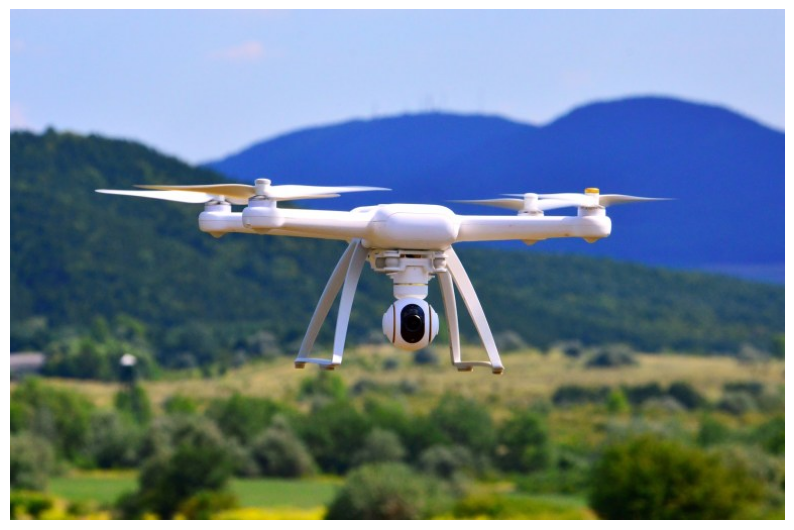

In [31]:
#@title Wybór po indeksach zdjęć dronów

idx = 402 #@param {type: 'slider', min:0, max: 918}
names_mapping=dict(enumerate(files_list_drone))
img_path = os.path.join(folder_path_drone, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)



(-0.5, 766.5, 424.5, -0.5)

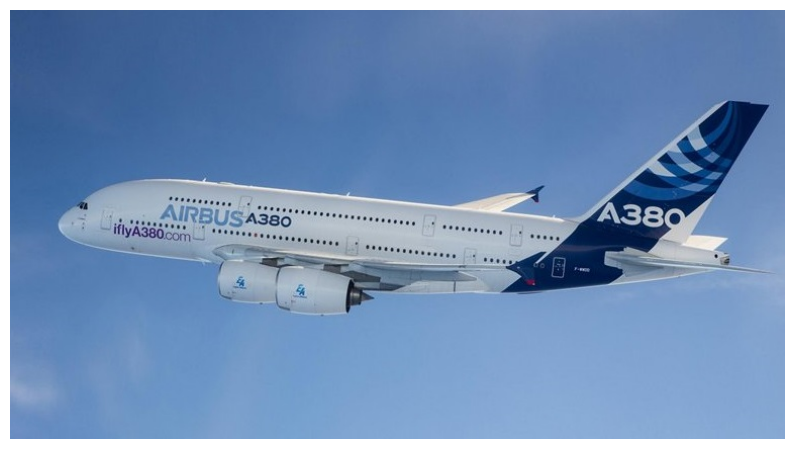

In [25]:
#@title Wybór po indeksach zdjęć samolotów

idx = 60 #@param {type: 'slider', min:0, max: 918}
names_mapping=dict(enumerate(files_list_plane))
img_path = os.path.join(folder_path_plane, names_mapping[idx])
img = image.load_img(img_path)


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.grid(False)
plt.axis(False)

In [32]:
train_datagen = ImageDataGenerator(
    rotation_range=40,     # zakres kąta o który losowo zostanie wykonany obrót obrazów
    rescale=1./255.,
    width_shift_range=0.2,  # pionowe przekształcenia obrazu
    height_shift_range=0.2, # poziome przekształcenia obrazu
    shear_range=0.2,        # zares losowego przycianania obrazu
    zoom_range=0.2,         # zakres losowego przybliżania obrazu
    horizontal_flip=True,   # losowe odbicie połowy obrazu w płaszczyźnie poziomej
    fill_mode='nearest'     # strategia wypełniania nowo utworzonych pikseli, któe mogą powstać w wyniku przekształceń
)

# przeskalowujemy wszystkie obrazy o współczynnik 1/255
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 1836 images belonging to 2 classes.
Found 524 images belonging to 2 classes.


In [33]:
def display_augmented_images(directory, idx):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

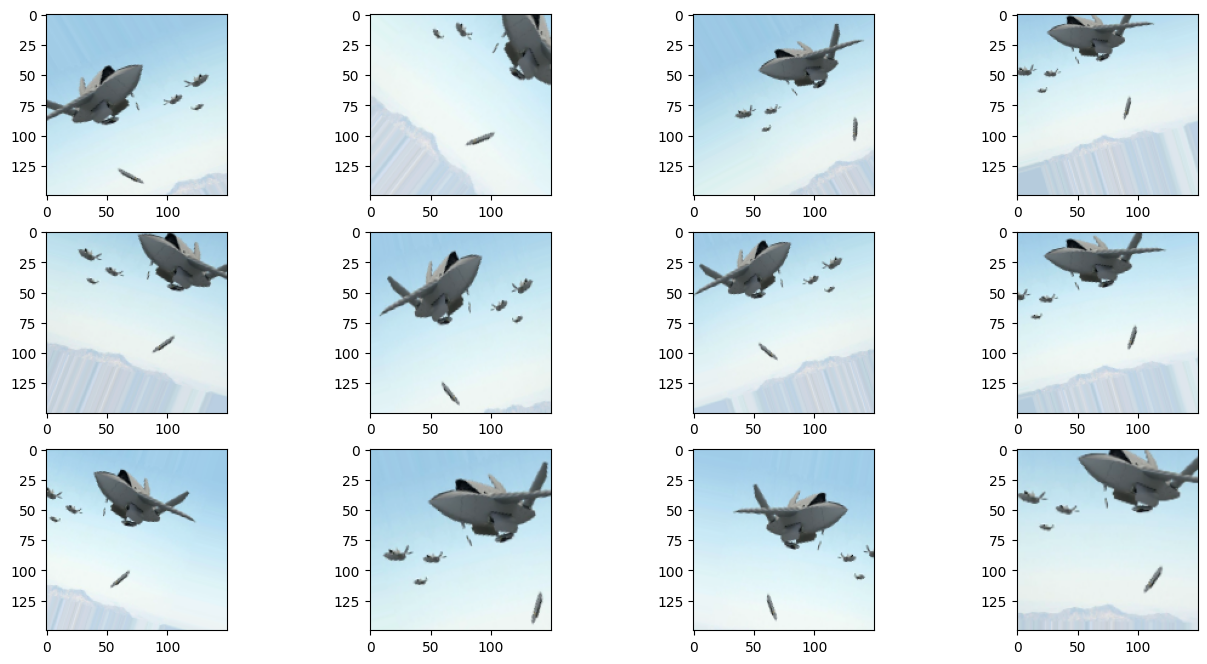

In [46]:
#@title Zbiór treningowy drone:
idx = 88 #@param {type:'slider', min:0, max:918}
display_augmented_images(folder_path_drone, idx)

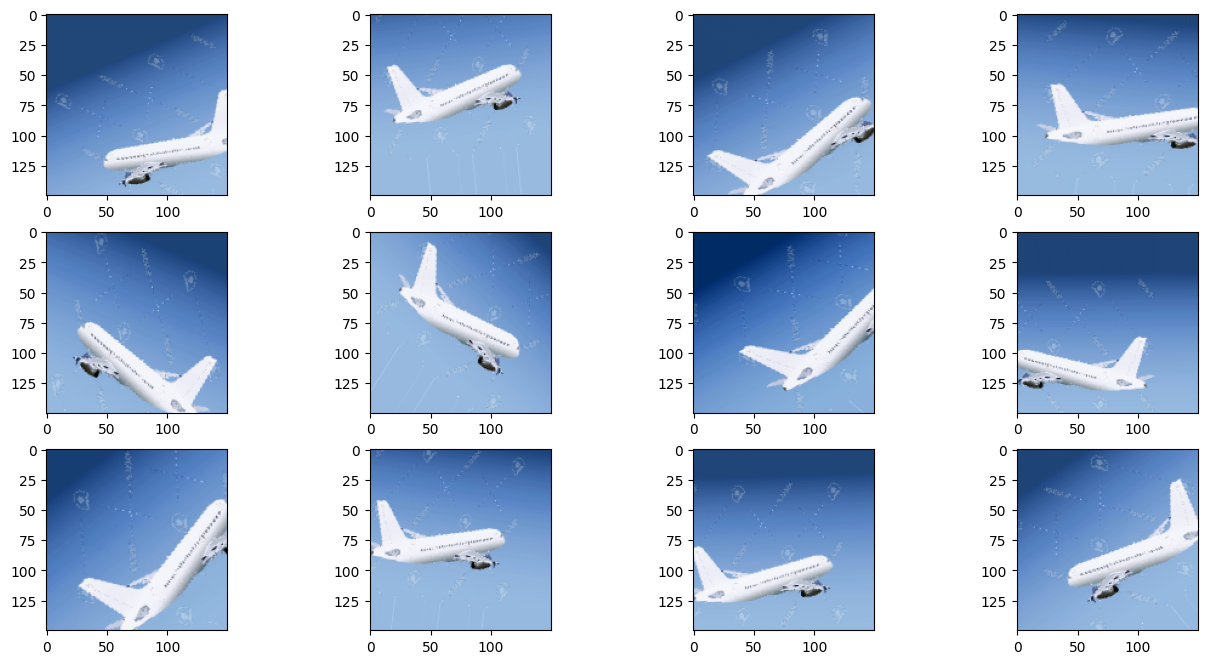

In [40]:
#@title Zbiór treningowy passenger:
idx = 111 #@param {type:'slider', min:0, max:918}
display_augmented_images(folder_path_plane, idx)

In [47]:
model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [50]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [51]:
!rm -rf logs
!mkdir logs

tensorboard = TensorBoard(log_dir='logs')

In [52]:
batch_size = 32
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size

history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=30,    # 100
                             validation_data=valid_generator,
                             validation_steps=validation_steps,
                             callbacks=[tensorboard])

<ipython-input-52-1d1a57a15d35>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/30
28/28 [==============================] - 85s 3s/step - loss: 0.6991 - accuracy: 0.5205 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 2/30
28/28 [==============================] - 72s 3s/step - loss: 0.6960 - accuracy: 0.5251 - val_loss: 0.6921 - val_accuracy: 0.5469
Epoch 3/30
28/28 [==============================] - 74s 3s/step - loss: 0.6885 - accuracy: 0.5737 - val_loss: 0.6700 - val_accuracy: 0.6406
Epoch 4/30
28/28 [==============================] - 71s 3s/step - loss: 0.6903 - accuracy: 0.5548 - val_loss: 0.6753 - val_accuracy: 0.5938
Epoch 5/30
28/28 [==============================] - 71s 3s/step - loss: 0.6704 - accuracy: 0.6049 - val_loss: 0.6599 - val_accuracy: 0.6133
Epoch 6/30
28/28 [==============================] - 71s 3s/step - loss: 0.6688 - accuracy: 0.6073 - val_loss: 0.6360 - val_accuracy: 0.6406
Epoch 7/30
28/28 [==============================] - 68s 2s/step - loss: 0.6623 - accuracy: 0.6183 - val_loss: 0.6354 - val_accuracy: 0.6328
Epoch 8/30
28/28 [==

In [53]:
%load_ext tensorboard

In [54]:
!tensorboard dev upload --logdir logs

2024-03-27 18:37:52.587636: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 18:37:52.587732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 18:37:52.589596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-27 18:37:54.059134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

In [55]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)